In [48]:
import nltk
import re
import string
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.utils import to_categorical

# Q1.  Write a unique paragraph (5-6 sentences) about your favorite topic (e.g., sports, technology, food, books, etc.).

In [3]:
text = "Technology has completely changed the way we live in the past 10 years. From smartphones to AI-powered apps, everything is becoming 5x faster and more convenient. Developers everywhere are coming up with smart, state-of-the-art solutions to tackle real-world challenges. With cloud computing and big data growing so fast, there are endless new possibilities. As a software engineer, I find it exciting to see how quickly the tech world keeps evolving—there's always something new to learn and explore."

## 1.	Convert text to lowercase and remove punctuation using re.

In [5]:
lower_text = text.lower()
lower_text

"technology has completely changed the way we live in the past 10 years. from smartphones to ai-powered apps, everything is becoming 5x faster and more convenient. developers everywhere are coming up with smart, state-of-the-art solutions to tackle real-world challenges. with cloud computing and big data growing so fast, there are endless new possibilities. as a software engineer, i find it exciting to see how quickly the tech world keeps evolving—there's always something new to learn and explore."

In [6]:
def remove_punctuation(text):
    return "".join([i for i in text if i not in string.punctuation])

no_punctutation_words = remove_punctuation(lower_text)
no_punctutation_words

'technology has completely changed the way we live in the past 10 years from smartphones to aipowered apps everything is becoming 5x faster and more convenient developers everywhere are coming up with smart stateoftheart solutions to tackle realworld challenges with cloud computing and big data growing so fast there are endless new possibilities as a software engineer i find it exciting to see how quickly the tech world keeps evolving—theres always something new to learn and explore'

## 2. Tokenize the text into words and sentences.

In [8]:
tokenized_word = word_tokenize(text)
tokenized_word

['Technology',
 'has',
 'completely',
 'changed',
 'the',
 'way',
 'we',
 'live',
 'in',
 'the',
 'past',
 '10',
 'years',
 '.',
 'From',
 'smartphones',
 'to',
 'AI-powered',
 'apps',
 ',',
 'everything',
 'is',
 'becoming',
 '5x',
 'faster',
 'and',
 'more',
 'convenient',
 '.',
 'Developers',
 'everywhere',
 'are',
 'coming',
 'up',
 'with',
 'smart',
 ',',
 'state-of-the-art',
 'solutions',
 'to',
 'tackle',
 'real-world',
 'challenges',
 '.',
 'With',
 'cloud',
 'computing',
 'and',
 'big',
 'data',
 'growing',
 'so',
 'fast',
 ',',
 'there',
 'are',
 'endless',
 'new',
 'possibilities',
 '.',
 'As',
 'a',
 'software',
 'engineer',
 ',',
 'I',
 'find',
 'it',
 'exciting',
 'to',
 'see',
 'how',
 'quickly',
 'the',
 'tech',
 'world',
 'keeps',
 'evolving—there',
 "'s",
 'always',
 'something',
 'new',
 'to',
 'learn',
 'and',
 'explore',
 '.']

In [9]:
tokenized_sent = sent_tokenize(text)
tokenized_sent 

['Technology has completely changed the way we live in the past 10 years.',
 'From smartphones to AI-powered apps, everything is becoming 5x faster and more convenient.',
 'Developers everywhere are coming up with smart, state-of-the-art solutions to tackle real-world challenges.',
 'With cloud computing and big data growing so fast, there are endless new possibilities.',
 "As a software engineer, I find it exciting to see how quickly the tech world keeps evolving—there's always something new to learn and explore."]

## 3.	Split using split() and word_tokenize() and compare how Python split and NLTK’s word_tokenize() differ.

In [11]:
split_text = text.split()
split_text

['Technology',
 'has',
 'completely',
 'changed',
 'the',
 'way',
 'we',
 'live',
 'in',
 'the',
 'past',
 '10',
 'years.',
 'From',
 'smartphones',
 'to',
 'AI-powered',
 'apps,',
 'everything',
 'is',
 'becoming',
 '5x',
 'faster',
 'and',
 'more',
 'convenient.',
 'Developers',
 'everywhere',
 'are',
 'coming',
 'up',
 'with',
 'smart,',
 'state-of-the-art',
 'solutions',
 'to',
 'tackle',
 'real-world',
 'challenges.',
 'With',
 'cloud',
 'computing',
 'and',
 'big',
 'data',
 'growing',
 'so',
 'fast,',
 'there',
 'are',
 'endless',
 'new',
 'possibilities.',
 'As',
 'a',
 'software',
 'engineer,',
 'I',
 'find',
 'it',
 'exciting',
 'to',
 'see',
 'how',
 'quickly',
 'the',
 'tech',
 'world',
 'keeps',
 "evolving—there's",
 'always',
 'something',
 'new',
 'to',
 'learn',
 'and',
 'explore.']

In [12]:
tokenized_word = word_tokenize(text)
tokenized_word

['Technology',
 'has',
 'completely',
 'changed',
 'the',
 'way',
 'we',
 'live',
 'in',
 'the',
 'past',
 '10',
 'years',
 '.',
 'From',
 'smartphones',
 'to',
 'AI-powered',
 'apps',
 ',',
 'everything',
 'is',
 'becoming',
 '5x',
 'faster',
 'and',
 'more',
 'convenient',
 '.',
 'Developers',
 'everywhere',
 'are',
 'coming',
 'up',
 'with',
 'smart',
 ',',
 'state-of-the-art',
 'solutions',
 'to',
 'tackle',
 'real-world',
 'challenges',
 '.',
 'With',
 'cloud',
 'computing',
 'and',
 'big',
 'data',
 'growing',
 'so',
 'fast',
 ',',
 'there',
 'are',
 'endless',
 'new',
 'possibilities',
 '.',
 'As',
 'a',
 'software',
 'engineer',
 ',',
 'I',
 'find',
 'it',
 'exciting',
 'to',
 'see',
 'how',
 'quickly',
 'the',
 'tech',
 'world',
 'keeps',
 'evolving—there',
 "'s",
 'always',
 'something',
 'new',
 'to',
 'learn',
 'and',
 'explore',
 '.']

In [13]:
## .split() splits only on spaces. word_tokenize() handles punctuation and contractions better.

## 4. Remove stopwords (using NLTK's stopwords list).

In [15]:
stopwords = stopwords.words('english')
no_stopwords = [i for i in tokenized_word if i not in stopwords]
no_stopwords

['Technology',
 'completely',
 'changed',
 'way',
 'live',
 'past',
 '10',
 'years',
 '.',
 'From',
 'smartphones',
 'AI-powered',
 'apps',
 ',',
 'everything',
 'becoming',
 '5x',
 'faster',
 'convenient',
 '.',
 'Developers',
 'everywhere',
 'coming',
 'smart',
 ',',
 'state-of-the-art',
 'solutions',
 'tackle',
 'real-world',
 'challenges',
 '.',
 'With',
 'cloud',
 'computing',
 'big',
 'data',
 'growing',
 'fast',
 ',',
 'endless',
 'new',
 'possibilities',
 '.',
 'As',
 'software',
 'engineer',
 ',',
 'I',
 'find',
 'exciting',
 'see',
 'quickly',
 'tech',
 'world',
 'keeps',
 'evolving—there',
 "'s",
 'always',
 'something',
 'new',
 'learn',
 'explore',
 '.']

## 5. Display word frequency distribution (excluding stopwords).

In [17]:
fdist = FreqDist(no_stopwords)
fdist

FreqDist({'.': 5, ',': 4, 'new': 2, 'Technology': 1, 'completely': 1, 'changed': 1, 'way': 1, 'live': 1, 'past': 1, '10': 1, ...})

# Q2. Using the same paragraph from Q1:

## 1. Extract all words with only alphabets using re.findall()

In [20]:
re.findall(r'\b[a-zA-Z]+\b',text)

['Technology',
 'has',
 'completely',
 'changed',
 'the',
 'way',
 'we',
 'live',
 'in',
 'the',
 'past',
 'years',
 'From',
 'smartphones',
 'to',
 'AI',
 'powered',
 'apps',
 'everything',
 'is',
 'becoming',
 'faster',
 'and',
 'more',
 'convenient',
 'Developers',
 'everywhere',
 'are',
 'coming',
 'up',
 'with',
 'smart',
 'state',
 'of',
 'the',
 'art',
 'solutions',
 'to',
 'tackle',
 'real',
 'world',
 'challenges',
 'With',
 'cloud',
 'computing',
 'and',
 'big',
 'data',
 'growing',
 'so',
 'fast',
 'there',
 'are',
 'endless',
 'new',
 'possibilities',
 'As',
 'a',
 'software',
 'engineer',
 'I',
 'find',
 'it',
 'exciting',
 'to',
 'see',
 'how',
 'quickly',
 'the',
 'tech',
 'world',
 'keeps',
 'evolving',
 'there',
 's',
 'always',
 'something',
 'new',
 'to',
 'learn',
 'and',
 'explore']

## 2. Remove stop words using NLTK’s stopword list

In [22]:
no_stopwords = [i for i in tokenized_word if i not in stop_words]
no_stopwords

['Technology',
 'completely',
 'changed',
 'way',
 'live',
 'past',
 '10',
 'years',
 '.',
 'From',
 'smartphones',
 'AI-powered',
 'apps',
 ',',
 'everything',
 'becoming',
 '5x',
 'faster',
 'convenient',
 '.',
 'Developers',
 'everywhere',
 'coming',
 'smart',
 ',',
 'state-of-the-art',
 'solutions',
 'tackle',
 'real-world',
 'challenges',
 '.',
 'With',
 'cloud',
 'computing',
 'big',
 'data',
 'growing',
 'fast',
 ',',
 'endless',
 'new',
 'possibilities',
 '.',
 'As',
 'software',
 'engineer',
 ',',
 'I',
 'find',
 'exciting',
 'see',
 'quickly',
 'tech',
 'world',
 'keeps',
 'evolving—there',
 "'s",
 'always',
 'something',
 'new',
 'learn',
 'explore',
 '.']

## 3. Perform stemming with PorterStemmer

In [24]:
stemmer = PorterStemmer()
stemmed_text = [stemmer.stem(words) for words in tokenized_word]
stemmed_text

['technolog',
 'ha',
 'complet',
 'chang',
 'the',
 'way',
 'we',
 'live',
 'in',
 'the',
 'past',
 '10',
 'year',
 '.',
 'from',
 'smartphon',
 'to',
 'ai-pow',
 'app',
 ',',
 'everyth',
 'is',
 'becom',
 '5x',
 'faster',
 'and',
 'more',
 'conveni',
 '.',
 'develop',
 'everywher',
 'are',
 'come',
 'up',
 'with',
 'smart',
 ',',
 'state-of-the-art',
 'solut',
 'to',
 'tackl',
 'real-world',
 'challeng',
 '.',
 'with',
 'cloud',
 'comput',
 'and',
 'big',
 'data',
 'grow',
 'so',
 'fast',
 ',',
 'there',
 'are',
 'endless',
 'new',
 'possibl',
 '.',
 'as',
 'a',
 'softwar',
 'engin',
 ',',
 'i',
 'find',
 'it',
 'excit',
 'to',
 'see',
 'how',
 'quickli',
 'the',
 'tech',
 'world',
 'keep',
 'evolving—ther',
 "'s",
 'alway',
 'someth',
 'new',
 'to',
 'learn',
 'and',
 'explor',
 '.']

## 4. Perform lemmatization with WordNetLemmatizer

In [26]:
lemmatizer = WordNetLemmatizer()
lemmatized_text = [lemmatizer.lemmatize(word) for word in tokenized_word]
lemmatized_text

['Technology',
 'ha',
 'completely',
 'changed',
 'the',
 'way',
 'we',
 'live',
 'in',
 'the',
 'past',
 '10',
 'year',
 '.',
 'From',
 'smartphones',
 'to',
 'AI-powered',
 'apps',
 ',',
 'everything',
 'is',
 'becoming',
 '5x',
 'faster',
 'and',
 'more',
 'convenient',
 '.',
 'Developers',
 'everywhere',
 'are',
 'coming',
 'up',
 'with',
 'smart',
 ',',
 'state-of-the-art',
 'solution',
 'to',
 'tackle',
 'real-world',
 'challenge',
 '.',
 'With',
 'cloud',
 'computing',
 'and',
 'big',
 'data',
 'growing',
 'so',
 'fast',
 ',',
 'there',
 'are',
 'endless',
 'new',
 'possibility',
 '.',
 'As',
 'a',
 'software',
 'engineer',
 ',',
 'I',
 'find',
 'it',
 'exciting',
 'to',
 'see',
 'how',
 'quickly',
 'the',
 'tech',
 'world',
 'keep',
 'evolving—there',
 "'s",
 'always',
 'something',
 'new',
 'to',
 'learn',
 'and',
 'explore',
 '.']

## 5.	Compare the stemmed and lemmatized outputs and explain when you’d prefer one over the other.

In [28]:
# Stemming: Faster, but can produce non-dictionary words. Good for search engines.

# Lemmatization: More accurate, returns valid root words. Better for analysis or NLP pipelines where grammatical correctness matters.

# Q3. Choose 3 short texts of your own

In [30]:
texts = [
    "The camera quality of this phone is amazing and battery lasts long.",
    "I love the display but the battery drains quickly.",
    "Great performance overall, but the phone heats up sometimes."
]

## 1. Use CountVectorizer to generate the Bag of Words representation.

In [32]:
count_vec = CountVectorizer()
bow_matrix = count_vec.fit_transform(texts)

print("Feature Names (Vocabulary):")
print(count_vec.get_feature_names_out())
print("\nBag of Words Matrix:\n", bow_matrix.toarray())

Feature Names (Vocabulary):
['amazing' 'and' 'battery' 'but' 'camera' 'display' 'drains' 'great'
 'heats' 'is' 'lasts' 'long' 'love' 'of' 'overall' 'performance' 'phone'
 'quality' 'quickly' 'sometimes' 'the' 'this' 'up']

Bag of Words Matrix:
 [[1 1 1 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0]
 [0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 2 0 0]
 [0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1]]


## 2. Use TfidfVectorizer to compute TF-IDF scores.

In [34]:
# Term frequency inverse document frequency
tfidf_vec = TfidfVectorizer()
tfidf_matrix = tfidf_vec.fit_transform(texts)

print("\nFeature Names:")
print(tfidf_vec.get_feature_names_out())
print("\nTF-IDF Matrix:\n", tfidf_matrix.toarray())


Feature Names:
['amazing' 'and' 'battery' 'but' 'camera' 'display' 'drains' 'great'
 'heats' 'is' 'lasts' 'long' 'love' 'of' 'overall' 'performance' 'phone'
 'quality' 'quickly' 'sometimes' 'the' 'this' 'up']

TF-IDF Matrix:
 [[0.30852405 0.30852405 0.23464049 0.         0.30852405 0.
  0.         0.         0.         0.30852405 0.30852405 0.30852405
  0.         0.30852405 0.         0.         0.23464049 0.30852405
  0.         0.         0.18221927 0.30852405 0.        ]
 [0.         0.         0.29711419 0.29711419 0.         0.39066946
  0.39066946 0.         0.         0.         0.         0.
  0.39066946 0.         0.         0.         0.         0.
  0.39066946 0.         0.46147135 0.         0.        ]
 [0.         0.         0.         0.27760064 0.         0.
  0.         0.36501149 0.36501149 0.         0.         0.
  0.         0.         0.36501149 0.36501149 0.27760064 0.
  0.         0.36501149 0.21558166 0.         0.36501149]]


## 3. Print and interpret the top 3 keywords from each text using TF-IDF.

In [36]:
feature_names = tfidf_vec.get_feature_names_out()

for i, row in enumerate(tfidf_matrix.toarray()):
    top_indices = row.argsort()[-3:][::-1]
    keywords = [feature_names[j] for j in top_indices]
    print(keywords)

['long', 'of', 'and']
['the', 'quickly', 'display']
['up', 'heats', 'sometimes']


# Q4. Write 2 short texts (4–6 lines each) describing two different technologies (e.g., AI vs Blockchain).

In [38]:
text1 = """Artificial Intelligence (AI) is revolutionizing the world. 
It enables machines to learn from data, recognize patterns, and make decisions.
AI is widely used in healthcare, finance, and autonomous vehicles.
It improves efficiency, reduces human error, and personalizes user experiences."""

text2 = """Blockchain is a decentralized digital ledger technology.
It ensures secure and transparent transactions across multiple systems.
Blockchain is widely used in cryptocurrency, supply chain, and voting systems.
It reduces fraud, removes intermediaries, and increases trust in digital exchanges."""

## 1. Preprocess and tokenize both texts.

In [50]:
def preprocess(text):
    lower_text = text.lower()
    text = "".join([word for word in lower_text if word not in string.punctuation])
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word not in stop_words]

tokens1 = preprocess(text1)
tokens2 = preprocess(text2)

print(tokens1)
print(tokens2)

['artificial', 'intelligence', 'ai', 'revolutionizing', 'world', 'enables', 'machines', 'learn', 'data', 'recognize', 'patterns', 'make', 'decisions', 'ai', 'widely', 'used', 'healthcare', 'finance', 'autonomous', 'vehicles', 'improves', 'efficiency', 'reduces', 'human', 'error', 'personalizes', 'user', 'experiences']
['blockchain', 'decentralized', 'digital', 'ledger', 'technology', 'ensures', 'secure', 'transparent', 'transactions', 'across', 'multiple', 'systems', 'blockchain', 'widely', 'used', 'cryptocurrency', 'supply', 'chain', 'voting', 'systems', 'reduces', 'fraud', 'removes', 'intermediaries', 'increases', 'trust', 'digital', 'exchanges']


## 2. Calculate:

## a. Jaccard Similarity using sets

In [54]:
set1 = set(tokens1)
set2 = set(tokens2)

jaccard_sim = len(set1 & set2) / len(set1 | set2)
print("Jaccard Similarity:", jaccard_sim)

Jaccard Similarity: 0.061224489795918366


## b. Cosine Similarity using TfidfVectorizer + cosine_similarity()

In [57]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform([text1, text2])

cos_sim = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])
print("Cosine Similarity:", cos_sim[0][0])

Cosine Similarity: 0.2659888657106111


## c. Analyze which similarity metric gives better insights in your case.

In [60]:
# Cosine Similarity gives better insights

## Q5. Write a short review for a product or service.

In [63]:
reviews = [
    "This phone has an amazing display and the battery lasts all day.",
    "The camera quality is poor and it heats up quickly.",
    "Decent performance for the price. Nothing extraordinary, but works fine.",
    "Absolutely love the smooth experience. Very fast and reliable.",
    "Not happy with the charging speed. It drains fast."
]

## 1. Use TextBlob or VADER to find polarity & subjectivity for each review.

In [66]:
for i, review in enumerate(reviews):
    blob = TextBlob(review)
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    print(f"Review {i+1}:")
    print(f"  Polarity: {polarity}")
    print(f"  Subjectivity: {subjectivity}")

Review 1:
  Polarity: 0.6000000000000001
  Subjectivity: 0.9
Review 2:
  Polarity: -0.033333333333333354
  Subjectivity: 0.55
Review 3:
  Polarity: 0.3055555555555556
  Subjectivity: 0.7222222222222222
Review 4:
  Polarity: 0.3866666666666667
  Subjectivity: 0.6266666666666667
Review 5:
  Polarity: -0.1
  Subjectivity: 0.8


## 2. Classify reviews into Positive / Negative / Neutral.

In [69]:
def classify_sentiment(polarity):
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

for i, review in enumerate(reviews):
    blob = TextBlob(review)
    sentiment = classify_sentiment(blob.sentiment.polarity)
    print(f"Review {i+1} is {sentiment}")

Review 1 is Positive
Review 2 is Negative
Review 3 is Positive
Review 4 is Positive
Review 5 is Negative


## 3. Create a word cloud using the wordcloud library for all positive reviews.

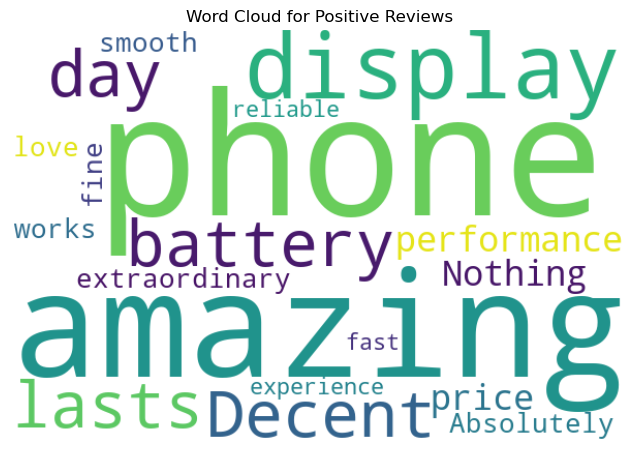

In [72]:
positive_text = " ".join([
    review for review in reviews if TextBlob(review).sentiment.polarity > 0
])

wordcloud = WordCloud(width=600, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Positive Reviews")
plt.show()

# Q6. Choose your own paragraph (~100 words) as training data.

In [75]:
text = """Technology is evolving faster than ever. Artificial intelligence and machine learning are shaping the future. 
From self-driving cars to intelligent assistants, innovation is everywhere. Developers are continuously building smarter systems. 
The rise of cloud computing and data analytics has transformed how businesses operate. 
With each advancement, we move closer to a more connected, efficient world."""

## 1. Tokenize text using Tokenizer() from keras.preprocessing.text

In [78]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])

total_words = len(tokenizer.word_index) + 1
print("Total words:", total_words)

# Convert text into sequence of tokens
input_sequences = []
tokens = tokenizer.texts_to_sequences([text])[0]

for i in range(1, len(tokens)):
    n_gram_sequence = tokens[:i+1]
    input_sequences.append(n_gram_sequence)
import numpy as np

tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])

total_words = len(tokenizer.word_index) + 1
print("Total words:", total_words)

# Convert text into sequence of tokens
input_sequences = []
tokens = tokenizer.texts_to_sequences([text])[0]

for i in range(1, len(tokens)):
    n_gram_sequence = tokens[:i+1]
    input_sequences.append(n_gram_sequence)

Total words: 52
Total words: 52


## 2. Create input sequences and build a simple LSTM or Dense model

In [81]:
max_sequence_len = max([len(seq) for seq in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre')

X = input_sequences[:, :-1]
y = to_categorical(input_sequences[:, -1], num_classes=total_words)

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 10, input_length=max_sequence_len-1))
model.add(LSTM(100))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=200, verbose=0)

C:\Users\kashi\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


## 3. Train the model and generate 2–3 new lines of text starting from any seed word you provide.

In [ ]:
seed_text = "technology"
next_words = 5

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict(token_list, verbose=0)
    predicted_word = tokenizer.index_word[np.argmax(predicted)]
    seed_text += " " + predicted_word

print("Generated text:", seed_text)